## Harnessing NLP for Historical Text Analysis: A Case Study on the Indus Valley Civilization

## Libraries

In [1]:
## Pre-loading the model before data source to optimize memory
from sentence_transformers import SentenceTransformer
#model = SentenceTransformer('sentence-transformers/msmarco-MiniLM-L-12-v3')

/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
from IPython.core.display import HTML, display
import urllib
import pysrt
import pandas as pd
import numpy as np
import math
from itertools import chain, combinations
from collections import Counter
from matplotlib import pyplot as plt

import faiss
import time
import emoji
from tqdm import tqdm
import networkx as nx

from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
import textacy
import textacy.preprocessing as tprep
import subprocess
print(subprocess.getoutput("python -m spacy download en_core_web_sm"))
import contractions
import spacy
nlp = spacy.load("en_core_web_sm")

from spellchecker import SpellChecker
spell = SpellChecker()

from gensim.models import LdaModel, Word2Vec
from gensim.corpora import Dictionary
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
mystopwords = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

import pyLDAvis
import pyLDAvis.gensim_models #don't skip this

from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.lsa import LsaSummarizer
LANGUAGE = "english"
stemmer = Stemmer(LANGUAGE)

from snorkel.preprocess import preprocessor
from snorkel.types import DataPoint
from snorkel.labeling import labeling_function, PandasLFApplier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import eli5
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

/var/folders/wj/4psym4l52gzbg9swfsnj2vzm0000gn/T/ipykernel_77655/544004033.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sahilkhanna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sahilkhanna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sahilkhanna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/12.8 MB ? eta -:--:--
     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/12.8 MB 7.7 MB/s eta 0:00:02
     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/12.8 MB 12.1 MB/s eta 0:00:01
     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/12.8 MB 24.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 5.6/12.8 MB 35.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 7.1/12.8 MB 39.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 7.6/12.8 MB 37.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 10.3/12.8 MB 37.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 12.8/12.8 MB 56.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Loading Text Source

* This text source is a wikipedia page about the Indus Valley Civilisation

In [3]:
url = "https://en.wikipedia.org/wiki/Indus_Valley_Civilisation"
html = urllib.request.urlopen(url)

# clean out the html get only the text
soupified = BeautifulSoup(html, "html.parser")
data_all = soupified.get_text().strip()
data = data_all[3946:78891]
#data = data_all[0:78834]

In [4]:
DF = pd.DataFrame(
    nltk.sent_tokenize(data),
    columns = ["text"]
)
DF.head()

,text
0,"The Indus Valley Civilisation[1] (IVC), also k..."
1,[2][a] Together with ancient Egypt and Mesopot...
2,[3][b] The civilisation flourished both in the...
3,[2][4]\nThe term Harappan is sometimes applied...
4,[5][c] The discovery of Harappa and soon after...


### Calculate the Number of Tokens

In [5]:
# show how many tokens the text source has?
print("Number of tokens:", len(nltk.word_tokenize(data)))

Number of tokens: 14236


### Summary of the Text Source

**&nbsp;1. Introduction of the text source.**

The **Wikipedia article** on the `Indus Valley Civilization (IVC)` serves as the primary source for this project. This publicly accessible and comprehensive page offers a detailed overview of one of the earliest urban cultures in the world, a civilization that thrived in the basins of the Indus River. The article is a treasure trove of information, with sections dedicated to the civilization's discovery, geographical reach, major sites, culture, economy, technology, writing system, and its eventual decline. The IVC, with its advanced urban planning and unique cultural aspects, holds a significant place in the narrative of ancient urban development.<br>
The text source contains **14236 tokens.**

**&nbsp;2. Brief description of the summary of the text. My interest in analyzing this data. What questions will I answer given from this dataset?**

**Brief Description of the Text**<br>
The Wikipedia article on the IVC presents a detailed account of this ancient civilization, recognized for its advanced urban planning, architecture, and social organization. It describes the layout of major cities like Harappa and Mohenjo-Daro, noting features such as the world's first known urban sanitation systems. The article also explores the economic practices, trade routes, cultural aspects, and mysterious script of the IVC, which remains undeciphered. It discusses various theories about the decline of civilization, including climate change and invasion theories.

**Interest in Analyzing This Text**<br>
The Indus Valley Civilization was an ancient society that significantly contributed to history. I have always been fascinated by its history, art, and innovations. To truly understand its complexities and achievements, I must delve deeper into its urban planning techniques, architecture, artistic expressions, technological advancements, culture and societal structure, and reasons for decline. Fortunately, the Wikipedia page on this civilization provides me with a dataset that can help me answer these questions. By exploring this dataset, I can gain valuable insights into this remarkable society.

Furthermore, using NLP to analyze a detailed and comprehensive text like a Wikipedia article demonstrates how modern AI tools can aid in historical research, making it more accessible and informative through technology.

## Processing Text

In [6]:
# Functions to clean and normalize the text
def normalize(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    text = tprep.replace.phone_numbers(text)
    text = tprep.replace.urls(text)
    text = tprep.replace.emails(text)
    text = tprep.replace.user_handles(text)
    text = tprep.replace.emojis(text)
    text = text.lower()
    return text

# Function to clean text
def clean_up(text):
    text = re.sub('</?[a-z]>', ' ', text)
    text = re.sub('♪', ' ', text)
    text = re.sub(r'\[\w+\]', '', text)
    text = re.sub("\\n", " ", text)
    return text

# Tokenize, remove stopwords, and lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to process text
def process_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    words = nltk.tokenize.word_tokenize(text)
    words = [word for word in words if word.isalnum()]  # Remove punctuation
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize
    return ' '.join(words)

In [7]:
# cleaning
DF_new = DF.copy()
DF["clean"] = DF["text"].apply(clean_up)
DF["processed"] = DF["clean"].apply(process_text)

# Normalize the rest of the text by using textacy.
#DF["normalized"] = DF["clean"].apply(normalize)
DF["normalized"] = DF["processed"].apply(normalize)
#DF["normalize"] = DF["processed"].apply(normalize)
DF.head()

,text,clean,processed,normalized
0,"The Indus Valley Civilisation[1] (IVC), also k...","The Indus Valley Civilisation (IVC), also know...",The Indus Valley Civilisation IVC also known I...,the indus valley civilisation ivc also known i...
1,[2][a] Together with ancient Egypt and Mesopot...,"Together with ancient Egypt and Mesopotamia, ...",Together ancient Egypt Mesopotamia one three e...,together ancient egypt mesopotamia one three e...
2,[3][b] The civilisation flourished both in the...,The civilisation flourished both in the alluv...,The civilisation flourished alluvial plain Ind...,the civilisation flourished alluvial plain ind...
3,[2][4]\nThe term Harappan is sometimes applied...,The term Harappan is sometimes applied to the...,The term Harappan sometimes applied Indus civi...,the term harappan sometimes applied indus civi...
4,[5][c] The discovery of Harappa and soon after...,The discovery of Harappa and soon afterwards ...,The discovery Harappa soon afterwards culminat...,the discovery harappa soon afterwards culminat...


In [8]:
# Examine spelling errors in at least one row of the dataset.

# find those words that may be misspelled
misspelled = spell.unknown(nltk.word_tokenize(DF["normalized"].iloc[1])) # or DF['normalize'][0]

for word in misspelled:
    # what is the word
    print(word)

    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

    print("----\n")

mesopotamia
None
None
----

asia
aria
{'aria', 'psia'}
----

civilisation
civilization
{'civilization'}
----



### Part of Speech Tagging

In [9]:
# part of speech tagging
#whole_text = " ".join(DF["clean"].to_list())
whole_text = " ".join(DF["normalized"].to_list())

spacy_pos_tagged = [(str(word), word.tag_, word.pos_) for word in nlp(whole_text)]
DF_tags = pd.DataFrame(spacy_pos_tagged, columns = ["token", "specific_pos", "universal_pos"])
DF_tags

,token,specific_pos,universal_pos
0,the,DT,DET
1,indus,NN,NOUN
2,valley,NN,NOUN
3,civilisation,NN,NOUN
4,ivc,NNP,PROPN
...,...,...,...
6745,indus,NN,NOUN
6746,towards,IN,ADP
6747,himalayan,JJ,ADJ
6748,foothill,NN,NOUN


In [10]:
DF_tags.query("universal_pos != 'PUNCT'", inplace=True)
DF_tags["universal_pos"].value_counts()

universal_pos
NOUN     2545
PROPN    1448
VERB      977
ADJ       915
ADV       296
NUM       230
ADP       117
DET       111
PRON       36
SCONJ      34
AUX        28
X           5
CCONJ       5
PART        1
INTJ        1
Name: count, dtype: int64

In [11]:
DF_cross_tabs = pd.crosstab(DF_tags["token"], DF_tags["universal_pos"])
DF_cross_tabs["total_tags"] = DF_cross_tabs.astype(bool).sum(axis=1)

#DF_cross_tabs.sort_values(["total_tags", "NOUN", "PROPN"], ascending=False).head(10)
#DF_cross_tabs.query("SPACE== 0 & SYM== 0 & X== 0").sort_values(["total_tags", "NOUN","PROPN"], ascending=False).head(10)
DF_cross_tabs.query("X== 0").sort_values(["total_tags", "NOUN","PROPN"], ascending=False).head(10)

universal_pos,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,SCONJ,VERB,X,total_tags
token,,,,,,,,,,,,,,,,
mehrgarh,2,0,0,0,0,0,0,8,0,0,0,11,0,5,0,4
bce,0,0,0,3,0,0,0,3,0,0,0,2,0,39,0,4
indus,0,0,0,0,0,0,0,108,0,0,0,23,0,3,0,3
site,0,0,0,0,0,0,0,66,0,0,0,3,0,1,0,3
harappan,0,0,0,0,0,0,0,60,0,0,0,31,0,2,0,3
seal,0,0,0,0,0,0,0,46,0,0,0,1,0,1,0,3
culture,0,0,0,0,0,0,0,37,0,0,0,17,0,2,0,3
language,0,0,0,0,0,0,0,14,0,0,0,1,0,1,0,3
archaeologist,0,0,0,0,0,0,0,6,0,0,0,3,0,1,0,3


### Processing Text Summary

**&nbsp;1. Summarizing the results from the raw text and part of the speech analysis section.**

The raw text analysis and the part of speech (POS) tagging provided significant insights into the structure and content of the Indus Valley Civilization Wikipedia article.<br>
The raw text processing involved cleaning operations such as removing special characters and HTML tags, standardizing text formatting, and eliminating citations and extraneous metadata. Methods like `regular expressions`, `nltk`, and the `textacy` library were used to identify the errors and strip unnecessary elements like _misplaced punctuation, stopwords, and citation notes(e.g., [1], [2])_. This was crucial for ensuring that the subsequent NLP tasks operated on clean data, yielding more accurate and meaningful results. Additionally, normalization techniques are used to standardize text, such as converting it to _lowercase and removing accents_, which helps reduce the data's complexity and variability. These steps are crucial as they directly impact the quality and reliability of downstream NLP tasks. The focus on removing impurities like suspicious characters was particularly important as they could lead to misinterpretations of the dataset's content. The NLP model can perform more effectively and provide more accurate insights by ensuring the data is clean and uniform.

**Part-of-Speech Tagging analysis**

POS tagging allowed for a detailed breakdown of the grammatical components within the text, identifying nouns, verbs, adjectives, etc., which helped in understanding the focus and narrative style of the article. Most notably, the prominence of nouns related to geographical locations, cultural terms, and historical periods highlighted the descriptive and factual nature of the text. Below is the summary from the POS analysis:

1. The most common part of speech in the analyzed text are `NOUN`, with `2545` occurrences.
2. There are words in the text that serve as multiple parts of speech. For example, the word `mehrgarh` appears as an adjective, verb, noun, and proper noun. Other words with multiple tags include `indus`, `harappan`, `culture`,  and `language`. This shows the flexibility of language usage in context, highlighting how the same word can serve different functions depending on its use in sentences.
3. After examining the most common nouns and verbs, the proper nouns are predominant. This likely points to a text rich in specific references, which could indicate historical or descriptive content. Verbs, while less frequent, could give clues about the predominant activities or processes described, further aiding in understanding the text's focus or narrative style.

However, the process was challenging. Handling the diversity of data formats within the article, such as lists, tables, and different section headings, was initially challenging as these elements required different cleaning strategies to ensure uniform text input for analysis. Implementing a more robust text preprocessing pipeline that automatically detects and appropriately handles various data formats could enhance efficiency and accuracy. Regarding normalization, techniques like lemmatization proved essential in reducing words to their base or dictionary form, which helps consolidate the variations of a word to a single entry, thus simplifying the analysis. It was surprising to observe the high frequency of certain cultural and geographical terms, which initially seemed less central to the narrative but highlighted underlying thematic emphases, such as trade routes and architectural features. This revelation underscores the importance of comprehensive preprocessing and detailed POS tagging in revealing subtle but significant aspects of text content in historical articles.

## Information Extraction

### KPE

* Use textacy to find the key phrases in the text.<br>
* Using textacy utilities, combine like key phrases.<br>

In [12]:
# KPE
#whole_text = " ".join(DF["normalized"].to_list())
whole_text = " ".join(DF["clean"].to_list())
# build an english language for textacy pipe
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser"))

# build a processor for textacy using spacy and process text
doc = textacy.make_spacy_doc(whole_text, lang = en)

# text rank algorithm
[kps for kps, weights in textacy.extract.keyterms.textrank(doc, normalize = "lemma",  topn = 5)]

['Mature Harappan Mature Harappan Period',
 'Early Harappan Early Harappan Period',
 'Indus River Valley site',
 'Indus Valley Civilisation(3300–1300 BC',
 'large Late Harappan site']

In [13]:
terms = set([term for term, weight in textacy.extract.keyterms.textrank(doc)])
print(textacy.extract.utils.aggregate_term_variants(terms))

[{'Mature Harappan Mature Harappan Period'}, {'Indus Valley Civilisation(3300–1300 BC'}, {'Early Harappan Early Harappan Period'}, {'Mature Harappan culture(2600–1900 BC'}, {'Early Harappan culture(3300–2600 BC'}, {'large Late Harappan site'}, {'Indus River Valley site'}, {'early Harappan culture'}, {'Mature Harappan site'}, {'Indus Valley site'}]


#### KPE Summary

**&nbsp;1. What did I learn about the text by using keyphrase analysis?**

The key phrase analysis reveals the following keyphrases:

1. Mature Harappan Period
2. Early Harappan Period
3. Indus River Valley site
4. Indus Valley Civilisation
5. large Late Harappan site

Additionally, the `aggregate_term_variants` function from `textacy` was used, which combines similar or related terms. The results include aggregated keyphrases like:

- Indus Valley Civilisation(3300–1300 BC)
- Mature Harappan culture(2600–1900 BC)
- Early Harappan culture(3300–2600 BC)
- large Late Harappan site
- Indus River Valley site
- Mature Harappan site

This analysis shows that the text contains the following:
- Discussions related to the Indus Valley Civilization.
- Focusing on different cultural phases (early, late, and mature).
- The geographical aspect (river valley sites).
- Specific time frames (3300–1300 BC, 3300–2600 BC, 2600–1900 BC) indicate a historical and archaeological context in the text.

The key phrase analysis helped to condense the text into core themes, making it apparent that the central subject is the historical and cultural study of the Indus Valley Civilization. It underscores the relevance of specific archeological sites and cultural periods, which could be pivotal for further studies or focused readings. This kind of analysis is useful for quickly understanding the main topics in large volumes of text or preparing for more in-depth research.

### NER

* Use spaCy to extract named entities.<br>
* Create a summary of the named entities.<br>
* Apply Snorkel to the data to show any relationship between names.<br>

In [14]:
# ner using spacy
whole_text = " ".join(DF["clean"].to_list())
spacy_ner_tagged = [(str(ent), ent.label_) for ent in nlp(whole_text).ents]
DF_ner = pd.DataFrame(spacy_ner_tagged, columns = ["token", "entity"])
DF_ner.head()

DF_ner["entity"].value_counts()

entity
GPE            386
ORG            311
PERSON         268
CARDINAL       215
DATE           123
NORP            98
LOC             90
ORDINAL         18
QUANTITY        16
PRODUCT         15
FAC             12
WORK_OF_ART      9
PERCENT          5
LANGUAGE         4
TIME             3
MONEY            2
EVENT            2
LAW              1
Name: count, dtype: int64

In [15]:
# snorkel

# create an empty spot to save the data
stored_entities = []

# first get the entities, must be two for relationship matches
# create a function to grab the entities so we can use apply
def get_entities(x):
    """
    Grabs the names using spacy's entity labeler
    """
    # get all the entities in this row
    processed = nlp(x)

    # get the tokens for each sentence
    tokens = [word.text for word in processed]

    # get all the entities
    temp = [(str(ent), ent.label_) for ent in processed.ents if ent.label_ != ""]

    # only move on if this row has at least two
    if len(temp) > 1:
        # finds all the combinations of pairs
        temp2 = list(combinations(temp, 2))

        # for each pair combination
        for (entity1, entity2) in temp2:
            # find the words for entity 1
            entity1_words = [word.text for word in nlp(entity1[0])]
            # find the token numbers for entity 1
            entity1_ids = [i for i, val in enumerate(tokens) if val in entity1_words]

            if len(entity1_words) > 1:
                entity1_ids2 = tuple(idx for idx in entity1_ids[0:2])
            else:
                id_1 = [idx for idx in entity1_ids]
                entity1_ids2 = (id_1[0], id_1[0])

            # do the same thing with person 2
            entity2_words = [word.text for word in nlp(entity2[0])]
            entity2_ids = [i for i, val in enumerate(tokens) if val in entity2_words[0:2]]
            if len(entity2_words) > 1:
                entity2_ids2 = tuple(idx for idx in entity2_ids[0:2])
            else:
                id_2 = [idx for idx in entity2_ids]
                entity2_ids2 = (id_2[0], id_2[0])

            # store all this in a list
            stored_entities.append(
                [x, # original text
                tokens, # tokens
                entity1[0], # entity 1 name
                entity2[0], # entity 2 name
                entity1_ids2, # entity 1 id token tuple
                entity2_ids2 # entity 2 id token tuple
                ])

#get_entities("Barbie and Ken went to the store, and Malibu bought a car.")
# list []
# of tuples () with two items 0, 1
# each of those tuples is a tuple of two items (), 0, 1
# where 0 is the word/token, 1 is the entity

In [16]:
# create an empty spot to save the data
stored_entities = []

DF["clean"].apply(get_entities)

# create dataframe in snorkel structure
DF_dev = pd.DataFrame(stored_entities,
                      columns = ["sentence", "tokens", "entity1",
                                 "entity2", "entity1_word_idx", "entity2_word_idx"])

DF_dev.head()

,sentence,tokens,entity1,entity2,entity1_word_idx,entity2_word_idx
0,"The Indus Valley Civilisation (IVC), also know...","[The, Indus, Valley, Civilisation, (, IVC, ), ...",The Indus Valley Civilisation,IVC,"(0, 1)","(5, 5)"
1,"The Indus Valley Civilisation (IVC), also know...","[The, Indus, Valley, Civilisation, (, IVC, ), ...",The Indus Valley Civilisation,the Indus Civilisation,"(0, 1)","(1, 11)"
2,"The Indus Valley Civilisation (IVC), also know...","[The, Indus, Valley, Civilisation, (, IVC, ), ...",The Indus Valley Civilisation,Bronze,"(0, 1)","(17, 17)"
3,"The Indus Valley Civilisation (IVC), also know...","[The, Indus, Valley, Civilisation, (, IVC, ), ...",The Indus Valley Civilisation,South Asia,"(0, 1)","(25, 26)"
4,"The Indus Valley Civilisation (IVC), also know...","[The, Indus, Valley, Civilisation, (, IVC, ), ...",The Indus Valley Civilisation,3300,"(0, 1)","(30, 30)"


In [17]:
from spacy.pipeline import EntityRuler

# dictionary with label and pattern is the rules
patterns = [{"label": "LOC",
              "pattern": [{"TEXT": "Indus"},
                          {"TEXT": "Valley"}, {"TEXT": "Civilisation"}]},
             {"label": "ORG",
              "pattern": [{"TEXT": "East"},
                          {"TEXT": "India"}, {"TEXT": "Company"}]},
             {"label": "GPE",
              "pattern": [{"TEXT": "Punjab"}]},
           {"label": "GPE",
              "pattern": [{"TEXT": "Multan"}]}]



In [18]:
whole_text = " ".join(DF["clean"].to_list())
ruler = nlp.add_pipe('entity_ruler', before='ner')
#ruler = EntityRuler(nlp, overwrite_ents=True)
ruler.add_patterns(patterns)
doc = nlp(whole_text)

from spacy import displacy
displacy.render(doc[0:300], style='ent')

/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/spacy/displacy/__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


#### Normalizing Named Entities

In [19]:
from spacy.tokens import Span
from spacy import Language

@Language.component("norm_entities")
def norm_entities(doc):
    ents = []
    for ent in doc.ents:
        if ent[0].pos_ == "DET": # leading article
            ent = Span(doc, ent.start+1, ent.end, label=ent.label)
        if len(ent) > 0:
            if ent[-1].pos_ == "PART": # trailing particle like 's
                ent = Span(doc, ent.start, ent.end-1, label=ent.label)
            ents.append(ent)
    doc.ents = tuple(ents)
    return doc

In [20]:
nlp.add_pipe('norm_entities')
doc = nlp(whole_text)
print(*[([t.text for t in e], e.label_) for e in doc[0:100].ents], sep='\n')

(['Indus', 'Valley', 'Civilisation'], 'LOC')
(['IVC'], 'ORG')
(['Indus', 'Civilisation'], 'ORG')
(['Bronze'], 'PERSON')
(['South', 'Asia'], 'LOC')
(['3300'], 'CARDINAL')
(['BCE'], 'ORG')
(['1300'], 'CARDINAL')
(['BCE'], 'ORG')
(['2600'], 'CARDINAL')
(['BCE'], 'ORG')
(['1900'], 'CARDINAL')
(['BCE'], 'ORG')
(['Egypt'], 'GPE')
(['Mesopotamia'], 'GPE')
(['one'], 'CARDINAL')
(['three'], 'CARDINAL')
(['Near', 'East'], 'LOC')
(['South', 'Asia'], 'LOC')
(['three'], 'CARDINAL')
(['Pakistan'], 'GPE')


#### Merging Entity Tokens

In [21]:
from spacy.pipeline import merge_entities
if nlp.has_pipe('merge_entities'): ###
    _ = nlp.remove_pipe('merge_entities') ###
nlp.add_pipe('merge_entities')

doc = nlp(whole_text)
print(*[(t.text, t.ent_type_) for t in doc[0:100] if t.ent_type_ != ''])

('Indus Valley Civilisation', 'LOC') ('IVC', 'ORG') ('Indus Civilisation', 'ORG') ('Bronze', 'PERSON') ('South Asia', 'LOC') ('3300', 'CARDINAL') ('BCE', 'ORG') ('1300', 'CARDINAL') ('BCE', 'ORG') ('2600', 'CARDINAL') ('BCE', 'ORG') ('1900', 'CARDINAL') ('BCE', 'ORG') ('Egypt', 'GPE') ('Mesopotamia', 'GPE') ('one', 'CARDINAL') ('three', 'CARDINAL') ('Near East', 'LOC') ('South Asia', 'LOC') ('three', 'CARDINAL') ('Pakistan', 'GPE') ('India', 'GPE') ('Afghanistan', 'GPE')


#### Coreference Resolution

In [22]:
# not in book, but useful if you modify the extension
from spacy.tokens import Token

if Token.has_extension('ref_n'):
    _ = Token.remove_extension('ref_n')
if Token.has_extension('ref_t'):
    _ = Token.remove_extension('ref_t')
if Token.has_extension('ref_t_'):
    _ = Token.remove_extension('ref_t_')

from spacy.tokens import Token
Token.set_extension('ref_n', default='') #ref name
Token.set_extension('ref_t', default='') #ref type

@Language.component("init_coref")
def init_coref(doc):
    for e in doc.ents:
        if e.label_ in ['LOC', 'ORG', 'GPE']:
            e[0]._.ref_n, e[0]._.ref_t = e.text, e.label_
    return doc

nlp.add_pipe("init_coref")

<function __main__.init_coref(doc)>

#### Alias Resolution

In [23]:
import pandas as pd
import spacy
from spacy.tokens import Span

def display_ner(doc, include_punct=False):
    """Generate data frame for visualization of spaCy doc with custom attributes."""

    rows = []
    for i, t in enumerate(doc):
        if not t.is_punct or include_punct:
            row = {'token': i,
                   'text': t.text, 'lemma': t.lemma_,
                   'pos': t.pos_, 'dep': t.dep_, 'ent_type': t.ent_type_,
                   'ent_iob_': t.ent_iob_}

            if doc.has_extension('has_coref'):
                if doc._.coref_clusters is not None and \
                   t.has_extension('in_coref') and t._.in_coref: # neuralcoref attributes
                    row['in_coref'] = t._.in_coref
                    row['main_coref'] = t._.coref_clusters[0].main.text
                else:
                    row['in_coref'] = None
                    row['main_coref'] = None
            if t.has_extension('ref_n'): # referent attribute
                row['ref_n'] = t._.ref_n
                row['ref_t'] = t._.ref_t
            if t.has_extension('ref_ent'): # ref_n/ref_t
                row['ref_ent'] = t._.ref_ent
            rows.append(row)

    df = pd.DataFrame(rows).set_index('token')
    df.index.name = None

    return df


def print_dep_tree(doc, skip_punct=True):
    """Utility function to pretty print the dependency tree."""

    def print_recursive(root, indent, skip_punct):
        if not root.dep_ == 'punct' or not skip_punct:
            print(" "*indent + f"{root} [{root.pos_}, {root.dep_}]")
        for left in root.lefts:
            print_recursive(left, indent=indent+4, skip_punct=skip_punct)
        for right in root.rights:
            print_recursive(right, indent=indent+4, skip_punct=skip_punct)

    for sent in doc.sents: # iterate over all sentences in a doc
        print_recursive(sent.root, indent=0, skip_punct=skip_punct)


# acronyms created after cooccurrence analysis
_acronyms = {
    'IVC': 'Indus Valley Civilisation',
    'ASI': 'Archaeological Survey of India',
    'HARP': 'Harappa Archaeological Research Project '
}

# add acronyms (all acronyms are organizations)
alias_lookup = {acro: (text, 'ORG') for (acro, text) in _acronyms.items()}

alias_lookup['IVC'] = ('Indus Valley Civilisation', 'LOC')

alias_list = {('Indus Valley Civilisation', 'LOC'):
                ['The Indus Valley Civilisation']
}

# invert alias_list; overwrites entries in acronyms like DOT
alias_lookup.update({alias: ent for (ent, aliases) in alias_list.items()
                                for alias in aliases})

In [24]:
@Language.component("propagate_ent_type")
def propagate_ent_type(doc):
    """propagate entity type stored in ref_t"""
    ents = []
    for e in doc.ents:
        if e[0]._.ref_n != '': # if e is a coreference
            e = Span(doc, e.start, e.end, label=e[0]._.ref_t)
        ents.append(e)
    doc.ents = tuple(ents)
    return doc

@Language.component("alias_resolver")
def alias_resolver(doc):
    """Lookup aliases and store result in ref_t, ref_n"""
    for ent in doc.ents:
        token = ent[0].text
        if token in alias_lookup:
            a_name, a_type = alias_lookup[token]
            ent[0]._.ref_n, ent[0]._.ref_t = a_name, a_type
    return propagate_ent_type(doc)

nlp.add_pipe('alias_resolver')

doc = nlp(whole_text)
display_ner(doc).query("ref_n != ''")[['text', 'ent_type', 'ref_n', 'ref_t']]

,text,ent_type,ref_n,ref_t
1,Indus Valley Civilisation,LOC,Indus Valley Civilisation,LOC
3,IVC,LOC,Indus Valley Civilisation,LOC
10,Indus Civilisation,ORG,Indus Civilisation,ORG
22,South Asia,LOC,South Asia,LOC
28,BCE,ORG,BCE,ORG
...,...,...,...,...
13014,Rajasthan,GPE,Rajasthan,GPE
13020,Cemetery H,ORG,Cemetery H,ORG
13033,Hinduism,GPE,Hinduism,GPE
13040,Indus Valley Civilisation,LOC,Indus Valley Civilisation,LOC


#### Resolving Name Variations

In [25]:
def name_match(m1, m2):
    m2 = re.sub(r'[()\.]', '', m2) # ignore parentheses and dots
    m2 = r'\b' + m2 + r'\b' # \b marks word boundary
    m2 = re.sub(r'\s+', r'\\b.*\\b', m2)
    return re.search(m2, m1, flags=re.I) is not None

@Language.component("name_resolver")
def name_resolver(doc):
    """create name-based reference to e1 as primary mention of e2"""
    ents = [e for e in doc.ents if e.label_ in ['ORG', 'PERSON']]
    for i, e1 in enumerate(ents):
        for e2 in ents[i+1:]:
            if name_match(e1[0]._.ref_n, e2[0].text):
                e2[0]._.ref_n = e1[0]._.ref_n
                e2[0]._.ref_t = e1[0]._.ref_t
    return propagate_ent_type(doc)

nlp.add_pipe('name_resolver')

doc = nlp(whole_text)
displacy.render(doc[0:300], style='ent')

/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/spacy/displacy/__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


#### Name Normalization

In [26]:
def strip_legal_suffix(text):
    return re.sub(r'(\s+and)?(\s+|\b(Co|Corp|Inc|Plc|Ltd)\b\.?)*$', '', text)

print(strip_legal_suffix('Hughes Tool Co'))

@Language.component("norm_names")
def norm_names(doc):
    for t in doc:
        if t._.ref_n != '' and t._.ref_t in ['ORG']:
            t._.ref_n = strip_legal_suffix(t._.ref_n)
            if t._.ref_n == '':
                t._.ref_t = ''

    return doc

nlp.add_pipe("norm_names")

Hughes Tool


<function __main__.norm_names(doc)>

In [27]:
# create an empty spot to save the data
stored_entities = []

DF["clean"].apply(get_entities)

# create dataframe in snorkel structure
DF_dev_master = pd.DataFrame(stored_entities,
                      columns = ["sentence", "tokens", "entity1",
                                 "entity2", "entity1_word_idx", "entity2_word_idx"])


In [28]:
DF_dev_master.head()

,sentence,tokens,entity1,entity2,entity1_word_idx,entity2_word_idx
0,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,IVC,"(1, 1)","(3, 3)"
1,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,Indus Civilisation,"(1, 1)",()
2,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,Bronze,"(1, 1)","(14, 14)"
3,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,South Asia,"(1, 1)","(22, 22)"
4,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,3300,"(1, 1)","(26, 26)"


In [29]:
# subset of main dataset for better visualization
DF_dev = DF_dev_master[0000:6000]
DF_dev.head()

,sentence,tokens,entity1,entity2,entity1_word_idx,entity2_word_idx
0,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,IVC,"(1, 1)","(3, 3)"
1,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,Indus Civilisation,"(1, 1)",()
2,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,Bronze,"(1, 1)","(14, 14)"
3,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,South Asia,"(1, 1)","(22, 22)"
4,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,3300,"(1, 1)","(26, 26)"


In [30]:
# exclude matches
DF_dev = DF_dev[DF_dev["entity1"] != DF_dev["entity2"]]

# exclude empties due to spacy misprocessing
DF_dev['too_small'] = DF_dev['entity1_word_idx'].apply(len) + DF_dev['entity2_word_idx'].apply(len)

DF_dev = DF_dev[DF_dev['too_small'] == 4]

DF_dev.head()

,sentence,tokens,entity1,entity2,entity1_word_idx,entity2_word_idx,too_small
0,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,IVC,"(1, 1)","(3, 3)",4
2,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,Bronze,"(1, 1)","(14, 14)",4
3,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,South Asia,"(1, 1)","(22, 22)",4
4,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,3300,"(1, 1)","(26, 26)",4
5,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,BCE,"(1, 1)","(28, 28)",4


In [31]:
# get words between the data points
@preprocessor()
def get_text_between(cand: DataPoint) -> DataPoint:
    """
    Returns the text between the two person mentions in the sentence
    """
    start = cand.entity1_word_idx[1] + 1
    end = cand.entity2_word_idx[0]
    cand.between_tokens = cand.tokens[start:end]
    return cand

# get words next to the data points
@preprocessor()
def get_left_tokens(cand: DataPoint) -> DataPoint:
    """
    Returns tokens in the length 5 window to the left of the person mentions
    """
    # TODO: need to pass window as input params
    window = 5

    end = cand.entity1_word_idx[0]
    cand.entity1_left_tokens = cand.tokens[0:end][-1 - window : -1]

    end = cand.entity2_word_idx[0]
    cand.entity2_left_tokens = cand.tokens[0:end][-1 - window : -1]
    return cand

In [32]:
# make this part up with words that are clues
friend = {"River", "!", "language", "veda", "Sanskrit", "Indus",
          "and"}

# this part important
is_friend = 1
not_friend = 0

@labeling_function(resources=dict(friend=friend), pre=[get_text_between])
def between_friend(x,friend):
    return is_friend if len(friend.intersection(set(x.between_tokens))) > 0 else not_friend

@labeling_function(resources=dict(friend=friend), pre=[get_left_tokens])
def left_friend(x,friend):
    if len(friend.intersection(set(x.entity1_left_tokens))) > 0:
        return is_friend
    elif len(friend.intersection(set(x.entity2_left_tokens))) > 0:
        return is_friend
    else:
        return not_friend

In [33]:
# create a list of functions to run
# lfs labeling functions
lfs = [
    between_friend,
    left_friend
]
# build the applier function
applier = PandasLFApplier(lfs)
# run it on the dataset
L_dev = applier.apply(DF_dev)
L_dev

100%|█████████████████████████████████████| 5521/5521 [00:01<00:00, 3052.96it/s]


array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [34]:
L_dev = pd.DataFrame(L_dev, columns = ["between_friend", "left_friend"])
L_dev

DF_combo = pd.concat([DF_dev, L_dev], axis = 1) #axis = 1 by column
DF_combo["friend"] = DF_combo["left_friend"] + DF_combo["between_friend"]
DF_combo.head()

,sentence,tokens,entity1,entity2,entity1_word_idx,entity2_word_idx,too_small,between_friend,left_friend,friend
0,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,IVC,"(1, 1)","(3, 3)",4.0,0.0,0.0,0.0
2,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,Bronze,"(1, 1)","(14, 14)",4.0,0.0,0.0,0.0
3,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,South Asia,"(1, 1)","(22, 22)",4.0,0.0,0.0,0.0
4,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,3300,"(1, 1)","(26, 26)",4.0,0.0,0.0,0.0
5,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,BCE,"(1, 1)","(28, 28)",4.0,0.0,0.0,0.0


In [35]:
DF_combo.query("friend !=0").head()

,sentence,tokens,entity1,entity2,entity1_word_idx,entity2_word_idx,too_small,between_friend,left_friend,friend
7,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,BCE,"(1, 1)","(28, 28)",4.0,1.0,1.0,2.0
9,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Indus Valley Civilisation,BCE,"(1, 1)","(28, 28)",4.0,1.0,0.0,1.0
17,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",IVC,1300,"(3, 3)","(30, 30)",4.0,1.0,1.0,2.0
19,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",IVC,2600,"(3, 3)","(39, 39)",4.0,1.0,0.0,1.0
34,"The Indus Valley Civilisation (IVC), also know...","[The, Indus Valley Civilisation, (, IVC, ), ,,...",Bronze,3300,"(14, 14)","(26, 26)",4.0,1.0,1.0,2.0


In [36]:
# entities cannot be equal
DF_combo = DF_combo[DF_combo["entity1"] != DF_combo["entity2"]]

# only our friend options
DF_friend = DF_combo[DF_combo["friend"] > 0]

# only our not friend options
DF_not = DF_combo[DF_combo["friend"] == 0]

print(DF_friend.shape)
print(DF_not.shape)

(4173, 10)
(1348, 10)


#### NER Summary

**&nbsp;1. What kinds of relationships did I explore? Did I find any?**

The NER focused on identifying and analyzing connections between named entities such as locations, people, organizations, and specific cultural or historical references, exploring possible relational links between the entities, and specifically addressing cultural and historical elements within a broader context. Here are some specific examples and findings:

**&nbsp;1. Geographical and Historical Relationships:** The analysis highlighted relationships involving geographical entities like "Indus Valley" and historical periods or cultural entities like "Harappan Culture." This suggests an emphasis on understanding the spatial and cultural-historical context of the entities discussed.

**&nbsp;2. Organizational Relationships:** Entities such as "ASI" (Archaeological Survey of India) and "HARP" (Harappa Archaeological Research Project) were linked, indicating explorations of how various research organizations interact with or relate to historical sites and projects.

**&nbsp;3. Cultural Connections:** This included exploring relationships between different cultural phases, such as "Early Harappan culture" and "Late Harappan culture," which provided insights into the continuity or evolution within the civilization.

**&nbsp;4. Alias and Coreference Resolutions:** Different names referring to the same entity are identified, such as "Indus Valley Civilisation" being referred to simply as "Indus" in some contexts. This is crucial for consolidating data points and understanding entity relationships comprehensively.

These analyses collectively aimed to enhance the understanding of the Indus Valley Civilisation by mapping out the interconnections between its various cultural, geographical, and institutional aspects. The application of named entity recognition (NER) and subsequent relational analysis provided a structured way to approach complex historical data, making it more accessible for educational and research purposes.

### Information Extraction Summary

**&nbsp;1. Summarizing the results from the information extraction section.**

The information extraction process showcased detailed text analysis, extracting and interpreting a rich array of entities and relationships, each providing a layer of analysis that contributed to a deeper understanding of the text.

**Key Learnings and Results:**
- **Keyphrase Extraction:** From the "KPE", phrases such as _"mature Harappan culture"_ and _"Indus River Valley site"_ were highlighted. This helped identify the main themes and topics, as the `Indus Valley civilization`, indicating the text's central focus areas.
- **Entities Identified:** Various entities like _"Indus Valley Civilisation"_ and _"Harappan Culture"_ were identified, signifying the text's key historical and cultural subjects. It was further expanded by detecting relationships like geographical connections between _"Rajasthan"_ and _"Gangetic Plain"_, showing the spatial spread of cultural influences.
- **Relationships Explored**: Relationships between these entities were extensively analyzed. For instance, geographical and organizational relationships were uncovered through NER and further validated or hypothesized using Snorkel, which employed labeling functions to suggest potential connections based on context and proximity.
For example, potential historical connections between _"Cemetery H culture"_ and _"Ochre Coloured Pottery culture"_ were examined, indicating how cultural practices might have spread or evolved.

However, despite these successes, there were gaps in the extraction where spaCy's general model failed to recognize certain specialized terms specific to the Indus Valley Civilization, such as particular cultural artifacts or less commonly referenced archaeological terms. This limitation suggests a potential improvement where training a custom model on a domain-specific corpus could enhance accuracy and comprehensiveness. Such a model could be trained on archaeological texts or databases to capture better the unique nomenclature and entities associated with historical and cultural studies. Expanding the scope of information extraction, techniques like relation extraction could also be employed to identify and understand the relationships between the extracted entities, such as the interactions between different cultural sites or the influence of specific historical figures on various events. To make information extraction easier and more accessible, we have the power to develop more interactive and user-friendly annotation tools for training data. These tools can put the control in our hands, allowing us to fine-tune the models to our specific needs. Integrating machine learning models with feedback loops where they learn from corrections and additions made by users could greatly enhance their learning efficiency and accuracy.

## Text Summarization

In [37]:
# define a search
def search(query, model, text_list):

    t=time.time()
    query_vector = model.encode([query])
    k = 5
    top_k = index.search(query_vector, k)
    print('totaltime: {}'.format(time.time()-t))
    return [text_list[_id] for _id in top_k[1].tolist()[0]]

In [38]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    return tokens

from rouge_score import rouge_scorer
def print_rouge_score(rouge_score):
    for k,v in rouge_score.items():
        print (k, 'Precision:', "{:.2f}".format(v.precision), 'Recall:', "{:.2f}".format(v.recall), 'fmeasure:', "{:.2f}".format(v.fmeasure))

In [39]:
# Function to process text
def process_text2(text):
    words = word_tokenize(text)
    #words = [word for word in words if word.isalnum()]  # Remove punctuation
    #words = [word for word in words if word not in stop_words]  # Remove stopwords
    #words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize
    return ' '.join(words)

In [40]:
# cleaning
DF_new["clean"] = DF_new["text"].apply(clean_up)
DF_new["processed"] = DF_new["clean"].apply(process_text2)
DF_new.head()

,text,clean,processed
0,"The Indus Valley Civilisation[1] (IVC), also k...","The Indus Valley Civilisation (IVC), also know...","The Indus Valley Civilisation ( IVC ) , also k..."
1,[2][a] Together with ancient Egypt and Mesopot...,"Together with ancient Egypt and Mesopotamia, ...","Together with ancient Egypt and Mesopotamia , ..."
2,[3][b] The civilisation flourished both in the...,The civilisation flourished both in the alluv...,The civilisation flourished both in the alluvi...
3,[2][4]\nThe term Harappan is sometimes applied...,The term Harappan is sometimes applied to the...,The term Harappan is sometimes applied to the ...
4,[5][c] The discovery of Harappa and soon after...,The discovery of Harappa and soon afterwards ...,The discovery of Harappa and soon afterwards M...


### Search Engine

* Using each sentence as my “documents”, create a search engine to find specific pieces of text.
* Search for several items.

In [41]:
sentences = DF_new['processed'].to_list()
#sentences = DF['processed'].to_list()
len(sentences)

396

In [42]:
## breaking the data into 3 smaller batches and processing each batch separately to manage memory usage better.
index = len(sentences)//3

sentences_1 = sentences[0:index]
sentences_2 = sentences[index:(index+index)]
sentences_3 = sentences[(index+index):((index+index+index)+2)]

In [43]:
model = SentenceTransformer('msmarco-MiniLM-L-12-v3')
embeddings_1 = model.encode(sentences_1)
embeddings_2 = model.encode(sentences_2)
embeddings_3 = model.encode(sentences_3)

/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [44]:
import numpy as np

# Concatenate along the first axis (axis=0)
IVC_embed = np.concatenate((embeddings_1, embeddings_2, embeddings_3), axis=0)
len(IVC_embed)

396

In [45]:
# Create an index using FAISS
index = faiss.IndexFlatL2(IVC_embed.shape[1])
index.add(IVC_embed)
faiss.write_index(index, 'index_IVC')

In [46]:
## Search for several items.

# read in the index later when you need to use this again
index = faiss.read_index('index_IVC')
# you do have to have the model open too
model = SentenceTransformer('msmarco-MiniLM-L-12-v3')

search("pottery", model, DF_new['processed'].to_list())

totaltime: 0.21999406814575195


["This site provides evidence of multiple social groups occupying the same village but using different pottery and living in different types of houses : `` over time the Late Harappan pottery was gradually replaced by Painted Grey ware pottery , '' and other cultural changes indicated by archaeology include the introduction of the horse , iron tools , and new religious practices .",
 "The pottery of the Late Harappan period is described as `` showing some continuity with mature Harappan pottery traditions '' , but also distinctive differences .",
 'Eventually an agreement was reached , whereby the finds , totalling some 12,000 objects ( most sherds of pottery ) , were split equally between the countries ; in some cases this was taken very literally , with some necklaces and girdles having their beads separated into two piles .',
 'At sites such as Bhagwanpura ( in Haryana ) , archaeological excavations have discovered an overlap between the final phase of Late Harappan pottery and the 

In [47]:
search("migration", model, DF_new['processed'].to_list())

totaltime: 0.01557612419128418


["Aryan migration See also : Vedic period and Indo-Aryan migrations Painted pottery urns from Harappa ( Cemetery H culture , c. 1900–1300 BCE ) , National Museum , New Delhi In 1953 Sir Mortimer Wheeler proposed that the invasion of an Indo-European tribe from Central Asia , the `` Aryans '' , caused the decline of the Indus civilisation .",
 'The latest research shows that Indus Valley people migrated from villages to cities .',
 'document intensive caravan trade with Central Asia and the Iranian plateau .',
 'Continuity and coexistence Archaeological excavations indicate that the decline of Harappa drove people eastward .',
 'The residents then migrated towards the Ganges basin in the east , where they established smaller villages and isolated farms .']

In [48]:
search("language", model, DF_new['processed'].to_list())

totaltime: 0.014929056167602539


['Finnish Indologist Asko Parpola concludes that the uniformity of the Indus inscriptions precludes any possibility of widely different languages being used , and that an early form of Dravidian language must have been the language of the Indus people .',
 "published in Science , computer scientists , comparing the pattern of symbols to various linguistic scripts and non-linguistic systems , including DNA and a computer programming language , found that the Indus script 's pattern is closer to that of spoken words , supporting the hypothesis that it codes for an as-yet-unknown language .",
 'have also demonstrated that a comparison of a non-linguistic system like medieval heraldic signs with natural languages yields results similar to those that Rao et al .',
 'Today , the Dravidian language family is concentrated mostly in southern India and northern and eastern Sri Lanka , but pockets of it still remain throughout the rest of India and Pakistan ( the Brahui language ) , which lends c

#### Search Engine Summary

**&nbsp;1. Examine the results and comment on how well I think the search engine worked.**<br>
From the results, it's evident that the search engine operates with precision. It adeptly retrieved sentences that contained specific keywords such as `pottery`, `migration`, and `language`. The search engine consistently produced relevant results for each query, including the term and its contextual usage within the text.

1. **"pottery" Query:** The results are comprehensive, including references to multiple social groups using different pottery, cultural changes in house types, and changes in pottery over time. The text even delves into how Harappan pottery traditions show continuity and distinctions with later periods, showcasing the search engine's depth of findings.
2. **"migration" Query**: The results discuss the migration of people from rural areas to cities, which aligns with historical migrations. It includes references to archaeological findings that support this migration, tying in the Indo-European migrations and their implications.
3. **"language" Query**: The results delve into the uniformity of Indus inscriptions, arguing against the presence of widely different languages among the Indus people and discussing linguistic symbols and non-linguistic systems. The response is relevant to the query, providing insights into linguistic analyses and theories concerning the Indus Valley Civilization, which is pertinent to a query on "language."

Overall, the search engine works well, with fast response times and accurate text retrieval based on the input queries, demonstrating relevance and efficiency.

### Recommendation System

* Using the same “documents”, create a recommendation system based on the sentences.
* Search for similar words within the recommendation system (i.e., search for themes in your document like “love”/”war”, etc.).

In [49]:
# Prepare the data for doc2vec, build and save a doc2vec model.
#sentences = DF_new['clean'].to_list()
d2vtrain = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sentences)]

# Build and Train Doc2Vec Model
model = Doc2Vec(vector_size=50, alpha=0.025, min_count=10, dm=1, epochs=100)
model.build_vocab(d2vtrain)

# Train the model
model.train(d2vtrain, total_examples = model.corpus_count, epochs = model.epochs)

# Save the model
model.save("d2v_ivc.model")
print("Model Saved")

Model Saved


In [50]:
# Load model
model = Doc2Vec.load("d2v_ivc.model")

# query
query = "urban planning"
query_vector = model.infer_vector(word_tokenize(query))
similar_sentences = model.dv.most_similar([query_vector])

# Print similar sentences
print(similar_sentences)

# Print recommended sentences
print("\n############################## Recommended Sentences ##############################")
for i in range(len(similar_sentences)):
    print(str(i+1)+").", sentences[int(similar_sentences[i][0])],"\n")

[('24', 0.8722306489944458), ('138', 0.8180112242698669), ('136', 0.8083223104476929), ('114', 0.8082464933395386), ('126', 0.8025462031364441), ('22', 0.7984138131141663), ('78', 0.7850322723388672), ('124', 0.7814505100250244), ('8', 0.7801505923271179), ('351', 0.7730388641357422)]

############################## Recommended Sentences ##############################
1). In the following millennia , settled life made inroads into the Indus plains , setting the stage for the growth of rural and urban settlements . 

2). As seen in Harappa , Mohenjo-daro and the recently partially excavated Rakhigarhi , this urban plan included the world 's first known urban sanitation systems . 

3). Cities Main article : Harappan architecture A sophisticated and technologically advanced urban culture is evident in the Indus Valley Civilisation , making them the first urban centre in the region . 

4). Kot Diji represents the phase leading up to Mature Harappan , with the citadel representing centralis

In [51]:
# Load model
model = Doc2Vec.load("d2v_ivc.model")

# query
query = "language"
query_vector = model.infer_vector(word_tokenize(query))
similar_sentences = model.dv.most_similar([query_vector])

# Print similar sentences
print(similar_sentences)

# Print recommended sentences
print("\n############################## Recommended Sentences ##############################")
for i in range(len(similar_sentences)):
    print(str(i+1)+").", sentences[int(similar_sentences[i][0])],"\n")

[('14', 0.8282967209815979), ('125', 0.8028552532196045), ('13', 0.79131019115448), ('148', 0.7436484098434448), ('284', 0.7402262091636658), ('223', 0.7376647591590881), ('181', 0.7289215922355652), ('239', 0.7142527103424072), ('151', 0.7079241871833801), ('89', 0.7072920799255371)]

############################## Recommended Sentences ##############################
1). A relationship with the Dravidian or Elamo-Dravidian language family is favoured by a section of scholars . 

2). The IVC residents did not develop irrigation capabilities , relying mainly on the seasonal monsoons leading to summer floods . 

3). The Harappan language is not directly attested , and its affiliations are uncertain , as the Indus script has remained undeciphered . 

4). There is no conclusive evidence of palaces or temples . 

5). Finnish Indologist Asko Parpola concludes that the uniformity of the Indus inscriptions precludes any possibility of widely different languages being used , and that an early f

#### Recommendation System Summary

**&nbsp;1. Does the recommendation system show similar sentences to the topic I mentioned? What I think might be a better set of text for recommendations?**<br>
The recommendation system effectively retrieved sentences related to specific queries like _"urban planning"_ and _"language"_, demonstrating its capability to fetch contextually relevant information from the `Indus Valley Civilization (IVC)` document. For _"urban planning"_, the system returned sentences on developing urban centers and sanitation systems, showcasing its semantic understanding of urban infrastructure. Similarly, for _"language"_, it accurately retrieved discussions on potential language families and the nature of the Indus script, indicating its proficiency in handling specific and abstract concepts.

However, the dataset could be expanded to enhance the system's utility and accuracy. Incorporating a broader range of documents covering various aspects of the IVC, including interdisciplinary studies and recent archaeological findings, would provide richer content and accuracy for recommendations.

### Text Summaries

* Create a human summary of the text.
* Create text summaries using LSA, TextRank, and Topic Modeling.
* Assess those summaries using the Rouge-N analyzer.

In [52]:
human_summary = "The Indus Valley Civilization, also known as the Harappan Civilization, was a Bronze Age civilization in South Asia \
that lasted from approximately 3300 BCE to 1300 BCE. It was one of the three early civilizations of the Near East and South Asia, \
and it was the most widespread, covering much of present-day Pakistan and northwestern India. \
The civilization is noted for its advanced urban planning, including using baked brick in construction, \
elaborate drainage systems and water supply systems. It also had large, non-residential buildings and was known for its handicrafts and \
metallurgy skills. Major urban centers like Mohenjo-Daro and Harappa likely had populations \
between 30,000 and 60,000 people at their peak, and the overall population may have been between one and five million. \
The decline of the civilization is believed to have been caused by a drying of the region, which reduced the water supply and \
led to its eventual demise."

In [53]:
DF.head()

,text,clean,processed,normalized
0,"The Indus Valley Civilisation[1] (IVC), also k...","The Indus Valley Civilisation (IVC), also know...",The Indus Valley Civilisation IVC also known I...,the indus valley civilisation ivc also known i...
1,[2][a] Together with ancient Egypt and Mesopot...,"Together with ancient Egypt and Mesopotamia, ...",Together ancient Egypt Mesopotamia one three e...,together ancient egypt mesopotamia one three e...
2,[3][b] The civilisation flourished both in the...,The civilisation flourished both in the alluv...,The civilisation flourished alluvial plain Ind...,the civilisation flourished alluvial plain ind...
3,[2][4]\nThe term Harappan is sometimes applied...,The term Harappan is sometimes applied to the...,The term Harappan sometimes applied Indus civi...,the term harappan sometimes applied indus civi...
4,[5][c] The discovery of Harappa and soon after...,The discovery of Harappa and soon afterwards ...,The discovery Harappa soon afterwards culminat...,the discovery harappa soon afterwards culminat...


#### Text Rank

In [54]:
#sentences = DF['processed'].to_list()
num_summary_sentences = 5
# be sure to put in one big long string
# this will parse things into sentences for summarization
parser = PlaintextParser.from_string(sentences, Tokenizer(LANGUAGE))
# builds a summarizer with a stemmer (which grabs english from above)
summarizer = TextRankSummarizer(stemmer)
# add the stops for the language we set (english)
summarizer.stop_words = get_stop_words(LANGUAGE)

tr_sum = []

for sentence in summarizer(parser.document, num_summary_sentences):
    tr_sum.append(str(sentence))

tr_sum = " ".join(tr_sum)

tr_sum[0:1000]

'", "Although over a thousand Mature Harappan sites have been reported and nearly a hundred excavated , there are five major urban centres : Mohenjo-daro in the lower Indus Valley ( declared a UNESCO World Heritage Site in 1980 as `` Archaeological Ruins at Moenjodaro \'\' ) , Harappa in the western Punjab region , Ganeriwala in the Cholistan Desert , Dholavira in western Gujarat ( declared a UNESCO World Heritage Site in 2021 as `` Dholavira : A Harappan City \'\' ) , and Rakhigarhi in Haryana . \', \'According to archaeologist Ratnagar , many Ghaggar-Hakra sites in India and Indus Valley sites in Pakistan are actually those of local cultures ; some sites display contact with Harappan civilisation , but only a few are fully developed Harappan ones . \', "Chronology Main article : Periodisation of the Indus Valley Civilisation History of South Asia Outline Palaeolithic ( 2,500,000–250,000 BC ) Madrasian culture Soanian culture Neolithic ( 10,800–3300 BC ) Bhirrana culture ( 7570–6200 B

#### LSA

In [55]:
summarizer = LsaSummarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

lsa_sum = []

for sentence in summarizer(parser.document, num_summary_sentences):
    lsa_sum.append(str(sentence))

lsa_sum = " ".join(lsa_sum)

lsa_sum[0:1000]

"', 'By 1924 , Marshall had become convinced of the significance of the finds , and on 24 September 1924 , made a tentative but conspicuous public intimation in the Illustrated London News : `` Not often has it been given to archaeologists , as it was given to Schliemann at Tiryns and Mycenae , or to Stein in the deserts of Turkestan , to light upon the remains of a long forgotten civilisation . ', 'Judging from the dispersal of Indus civilisation artefacts , the trade networks economically integrated a huge area , including portions of Afghanistan , the coastal regions of Persia connected by the Gulf of Oman from the Arabian Sea , northern and western India , and Mesopotamia , leading to the development of Indus-Mesopotamia relations . ', '( 2016 ) confirms that Indus populations were the earliest people to use complex multi-cropping strategies across both seasons , growing foods during summer ( rice , millets and beans ) and winter ( wheat , barley and pulses ) , which required diffe

#### Topic Modeling

In [56]:
# remember all the stuff from earlier that was loaded
# Create a dictionary representation of the documents.
# use our list of sentences from earlier
processed_sentences = [preprocess(sent) for sent in sentences]
# create the vocabulary list
dictionary = Dictionary(processed_sentences)
# convert to a term by document matrix
corpus = [dictionary.doc2bow(sent) for sent in processed_sentences]

# Train the topic model
LDAmodel = LdaModel(corpus = corpus,
                id2word = dictionary,
                iterations = 400,
                num_topics = 10,
                random_state = 100,
                update_every = 1,
                chunksize = 100,
                passes = 10,
                alpha = 'auto',
                per_word_topics = True)

probs = [LDAmodel.get_document_topics(sentence) for sentence in corpus]

save_probs = []
i = 0 # looping variable
for document in probs:
  for (topic, prob) in document:
    if topic == 0: # this is the topic zero but you can pick another one
      save_probs.append((sentences[i], prob))
  i = i + 1

DF_lda = pd.DataFrame(save_probs, columns = ["sentence", "prob"])

topic_sum = " ".join(DF_lda.sort_values(by = ["prob"], ascending = False)[0:num_summary_sentences].sentence)
topic_sum

"Following a tradition in archaeology , the civilisation is sometimes referred to as the Harappan , after its type site , Harappa , the first site to be excavated in the 1920s ; this is notably true of usage employed by the Archaeological Survey of India after India 's independence in 1947 . It is claimed by its excavator to have been a dockyard , connected by channels to a neighbouring estuary . They were among the first to develop a system of uniform weights and measures . Authority and governance Archaeological records provide no immediate answers for a centre of power or for depictions of people in power in Harappan society . There was no single ruler but several cities like Mohenjo-daro had a separate ruler , Harappa another , and so forth ."

In [57]:
# Get the top topics
top_topics = LDAmodel.print_topics(num_words=10)
top_topics[0:3]

[(0,
  '0.022*"religious" + 0.017*"symbols" + 0.016*"decline" + 0.011*"pashupati" + 0.011*"indian" + 0.010*"however" + 0.010*"like" + 0.010*"several" + 0.008*"linguistic" + 0.008*"languages"'),
 (1,
  '0.045*"indus" + 0.028*"valley" + 0.021*"river" + 0.020*"civilisation" + 0.016*"inscriptions" + 0.014*"identified" + 0.011*"religion" + 0.010*"cattle" + 0.009*"length" + 0.008*"pakistan"'),
 (2,
  '0.039*"used" + 0.015*"language" + 0.014*"even" + 0.012*"basin" + 0.012*"indus" + 0.009*"largely" + 0.008*"support" + 0.008*"hypothesis" + 0.008*"also" + 0.007*"individuals"')]

#### Rouge-N analyzer
* Assess those summaries using the Rouge-N analyzer.

In [58]:
# build a blank model
scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
# add the gold standard and summary you want to compare
# scores = scorer.score(gold_standard, summary)
# print the scores
# print_rouge_score(scores)

# compare to human-generated summary
print("\n############################## Compared to human-generated summary ##############################")
print("#### TextRank ####")
print_rouge_score(scorer.score(human_summary, tr_sum))

print("\n#### LSA ####")
print_rouge_score(scorer.score(human_summary, lsa_sum))

print("\n#### Topic Modeling ####")
print_rouge_score(scorer.score(human_summary, topic_sum))



############################## Compared to human-generated summary ##############################
#### TextRank ####
rouge1 Precision: 0.07 Recall: 0.45 fmeasure: 0.12

#### LSA ####
rouge1 Precision: 0.24 Recall: 0.40 fmeasure: 0.30

#### Topic Modeling ####
rouge1 Precision: 0.34 Recall: 0.27 fmeasure: 0.30


### Text Summarization Summary

**&nbsp;1. Summarizing the results from the text summarization section. Do I feel the bag of words methods are useful for text summarization? Can I make a good summary by grabbing sentences from the text, or should I explore text generation more? Do I think enterprise search engines are useful for my work? What other things might I do with the information from text summarization?**

The text summarization section focused on extracting key points from the Wikipedia article on the Indus Valley Civilization using various methods, including the bag of words approach and sentence extraction based on relevance and keyword density. These techniques effectively distilled the article into its most essential elements, highlighting major topics such as the geographical spread, cultural practices, and notable archaeological findings of the IVC. While the bag of words method provided a straightforward, keyword-based overview, it sometimes needed to include the nuanced connections between concepts vital for a holistic understanding of the subject matter. This indicates that while bag of words methods can identify prominent themes or keywords, they may only sometimes construct a coherent narrative or capture the deeper storyline within the text.

Based on the `Rouge-N scores` provided, the best summary compared to the human-generated summary was the one generated by __Topic Modeling__. It had the highest **fmeasure** of **0.30** compared to the _TextRank(0.12)_ and _LSA(0.30)_ summaries. This suggests that the Topic Modeling summarizer was more effective in capturing the essential points and reflecting the content and style of the human summary.

Considering the limitations of basic summarization methods like bag of words, exploring more advanced text generation techniques, such as those employing machine learning models like BERT or GPT, might yield better results. Through their understanding of language models and contextual relationships, these models can generate summaries that maintain narrative flow and offer a more nuanced understanding of complex texts. Additionally, enterprise search engines that utilize these sophisticated summarization techniques could be highly beneficial for quickly retrieving and condensing vast amounts of information. This would be particularly useful in professional fields where large volumes of data are common, such as academic research, legal studies, or historical documentation. Further applications of text summarization could include:
* Creating executive summaries for lengthy reports.
* Generating concise explanations for educational materials.
* Even developing automated content for informational websites, each of which would benefit from more advanced, context-aware summarization capabilities that go beyond simple keyword extraction.



## Classification

In [59]:
from textblob import TextBlob

# Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Categorize sentiment into positive, negative, and neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to your DataFrame
DF['sentiment'] = DF['normalized'].apply(analyze_sentiment)
DF.head()

,text,clean,processed,normalized,sentiment
0,"The Indus Valley Civilisation[1] (IVC), also k...","The Indus Valley Civilisation (IVC), also know...",The Indus Valley Civilisation IVC also known I...,the indus valley civilisation ivc also known i...,positive
1,[2][a] Together with ancient Egypt and Mesopot...,"Together with ancient Egypt and Mesopotamia, ...",Together ancient Egypt Mesopotamia one three e...,together ancient egypt mesopotamia one three e...,positive
2,[3][b] The civilisation flourished both in the...,The civilisation flourished both in the alluv...,The civilisation flourished alluvial plain Ind...,the civilisation flourished alluvial plain ind...,negative
3,[2][4]\nThe term Harappan is sometimes applied...,The term Harappan is sometimes applied to the...,The term Harappan sometimes applied Indus civi...,the term harappan sometimes applied indus civi...,positive
4,[5][c] The discovery of Harappa and soon after...,The discovery of Harappa and soon afterwards ...,The discovery Harappa soon afterwards culminat...,the discovery harappa soon afterwards culminat...,neutral


In [60]:
DF_classify = DF[["clean","sentiment"]]
DF_classify = DF_classify.rename(columns={"clean":"text"})
DF_classify.head()

,text,sentiment
0,"The Indus Valley Civilisation (IVC), also know...",positive
1,"Together with ancient Egypt and Mesopotamia, ...",positive
2,The civilisation flourished both in the alluv...,negative
3,The term Harappan is sometimes applied to the...,positive
4,The discovery of Harappa and soon afterwards ...,neutral


In [61]:
# Preprocessing 1
def data_clean(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = text.lower() # lower case
    # punctuation ?
    # contractions
    text = contractions.fix(text)
    # stop words
    text = " ".join([word for word in nltk.word_tokenize(text) if word not in stop_words])
    # lemmatization
    temp = nlp(text)
    text = " ".join([word.lemma_ for word in temp])
    return(text)

# Preprocessing 2
def data_clean2(text):

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = text.lower()
    text = re.sub('</?[a-z]>', ' ', text)
    text = re.sub('♪', ' ', text)
    text = re.sub(r'\[\w+\]', '', text)

    # Convert emoticons to words
    text = emoji.demojize(text)

    # Remove URLs and mentions
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+", '', text, flags=re.MULTILINE)

    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]  # Remove punctuation
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize
    return ' '.join(text)

In [62]:
DF_classify['clean'] = DF_classify['text'].apply(data_clean)
DF_classify['clean2'] = DF_classify['text'].apply(data_clean2)
DF_classify.head()

,text,sentiment,clean,clean2
0,"The Indus Valley Civilisation (IVC), also know...",positive,"indus valley civilisation ( ivc ) , also know ...",indus valley civilisation ivc also known indus...
1,"Together with ancient Egypt and Mesopotamia, ...",positive,"together ancient egypt mesopotamia , one three...",together ancient egypt mesopotamia one three e...
2,The civilisation flourished both in the alluv...,negative,civilisation flourish alluvial plain indus riv...,civilisation flourished alluvial plain indus r...
3,The term Harappan is sometimes applied to the...,positive,term harappan sometimes apply indus civilisati...,term harappan sometimes applied indus civilisa...
4,The discovery of Harappa and soon afterwards ...,neutral,discovery harappa soon afterwards mohenjo - da...,discovery harappa soon afterwards culmination ...


### Split the Modeling Data

In [63]:
def split_data(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, # X values
                                                        y, # Y values
                                                        test_size = 0.2, # test size
                                                        random_state = 89543, # random shuffle
                                                        stratify = y)


    print("################### X_train #########################")
    print(X_train.head())

    print("\n################### Y_train #########################")
    print(Y_train.head())

    return X_train, X_test, Y_train, Y_test

### Feature Extractions

* The bag of words encoding using the count vectorizer.
* The TF-IDF normalization using the tfidf vectorizer.

#### Bag of words Encoding

In [64]:
def b_o_w(X_train, X_test):

    # create a blank extractor
    bow = CountVectorizer()

    # fit the data to it
    bow_train = bow.fit_transform(X_train)

    # transform the second data to it matches to the fit_transform vocab
    bow_test = bow.transform(X_test)

    return bow_train, bow_test, bow

In [65]:
# Using clean-up 1
X_train, X_test, Y_train, Y_test = split_data(DF_classify['clean'], DF_classify['sentiment'])

bow_train, bow_test, bow = b_o_w(X_train, X_test)
print(bow_train.shape)
print(bow_test.shape)

################### X_train #########################
336    late harappan late harappan period , c. 1900–1...
34     indus valley site find often river , also anci...
215    seal ; 3000–1500 ; baked steatite ; 2 × 2 cm ;...
79     2008 , 616 site report india , whereas 406 sit...
95     mehrgarh one early site evidence farming herd ...
Name: clean, dtype: object

################### Y_train #########################
336    negative
34      neutral
215    positive
79      neutral
95      neutral
Name: sentiment, dtype: object
(316, 2209)
(80, 2209)


In [66]:
# Using clean-up 2
X_train, X_test, Y_train, Y_test = split_data(DF_classify['clean2'], DF_classify['sentiment'])

bow_train2, bow_test2, bow2 = b_o_w(X_train, X_test)
print(bow_train2.shape)
print(bow_test2.shape)

################### X_train #########################
336    late harappan late harappan period bce bronze ...
34     indus valley site found often river also ancie...
215    seal bc baked steatite 2 2 cm metropolitan mus...
79     2008 616 site reported india whereas 406 site ...
95     mehrgarh one earliest site evidence farming he...
Name: clean2, dtype: object

################### Y_train #########################
336    negative
34      neutral
215    positive
79      neutral
95      neutral
Name: sentiment, dtype: object
(316, 2089)
(80, 2089)


#### TF-IDF normalization

In [67]:
def tf_idf(X_train, X_test, Y_train, Y_test):

    # create a blank extractor
    tfidf = TfidfVectorizer()

    # fit the data to it
    tf_train = tfidf.fit_transform(X_train)

    # transform the second data to it matches to the fit_transform vocab
    tf_test = tfidf.transform(X_test)

    return tf_train, tf_test, tfidf

In [68]:
# Using clean-up 1
X_train, X_test, Y_train, Y_test = split_data(DF_classify['clean'], DF_classify['sentiment'])
tf_train, tf_test, tfidf = tf_idf(X_train, X_test, Y_train, Y_test)
print(tf_train.shape)
print(tf_test.shape)

################### X_train #########################
336    late harappan late harappan period , c. 1900–1...
34     indus valley site find often river , also anci...
215    seal ; 3000–1500 ; baked steatite ; 2 × 2 cm ;...
79     2008 , 616 site report india , whereas 406 sit...
95     mehrgarh one early site evidence farming herd ...
Name: clean, dtype: object

################### Y_train #########################
336    negative
34      neutral
215    positive
79      neutral
95      neutral
Name: sentiment, dtype: object
(316, 2209)
(80, 2209)


In [69]:
# Using clean-up 2
X_train, X_test, Y_train, Y_test = split_data(DF_classify['clean2'], DF_classify['sentiment'])
tf_train2, tf_test2, tfidf2 = tf_idf(X_train, X_test, Y_train, Y_test)
print(tf_train2.shape)
print(tf_test2.shape)

################### X_train #########################
336    late harappan late harappan period bce bronze ...
34     indus valley site found often river also ancie...
215    seal bc baked steatite 2 2 cm metropolitan mus...
79     2008 616 site reported india whereas 406 site ...
95     mehrgarh one earliest site evidence farming he...
Name: clean2, dtype: object

################### Y_train #########################
336    negative
34      neutral
215    positive
79      neutral
95      neutral
Name: sentiment, dtype: object
(316, 2089)
(80, 2089)


### Classify

* Use at least two classification algorithms to predict the outcome of the data.
* Include the model assessment of these predictions for all models.

#### Logistic Regression

In [70]:
# log regression
# build a blank model
def log_model(X_train, Y_train, X_test, Y_test):
    logreg = LogisticRegression(max_iter = 10000)
    # fit the training data to the model
    logreg.fit(X_train, Y_train)
    # predict test cases
    y_pred = logreg.predict(X_test)
    # compare predicts to the actuals
    print(classification_report(y_true = Y_test, y_pred = y_pred))

    return logreg

logreg_bow = log_model(bow_train, Y_train, bow_test, Y_test)

              precision    recall  f1-score   support

    negative       0.50      0.14      0.22        14
     neutral       0.53      0.80      0.64        30
    positive       0.71      0.61      0.66        36

    accuracy                           0.60        80
   macro avg       0.58      0.52      0.51        80
weighted avg       0.61      0.60      0.57        80



In [71]:
logreg_bow2 = log_model(bow_train2, Y_train, bow_test2, Y_test)

              precision    recall  f1-score   support

    negative       0.50      0.14      0.22        14
     neutral       0.59      0.90      0.71        30
    positive       0.77      0.64      0.70        36

    accuracy                           0.65        80
   macro avg       0.62      0.56      0.54        80
weighted avg       0.65      0.65      0.62        80



In [72]:
logreg_tf = log_model(tf_train, Y_train, tf_test, Y_test)

              precision    recall  f1-score   support

    negative       1.00      0.14      0.25        14
     neutral       0.42      0.33      0.37        30
    positive       0.54      0.81      0.64        36

    accuracy                           0.51        80
   macro avg       0.65      0.43      0.42        80
weighted avg       0.57      0.51      0.47        80



In [73]:
logreg_tf2 = log_model(tf_train2, Y_train, tf_test2, Y_test)

              precision    recall  f1-score   support

    negative       1.00      0.07      0.13        14
     neutral       0.56      0.47      0.51        30
    positive       0.57      0.86      0.69        36

    accuracy                           0.57        80
   macro avg       0.71      0.47      0.44        80
weighted avg       0.64      0.57      0.52        80



#### Naive Bayes

In [74]:
# bayes
def naive_bayes(X_train, Y_train, X_test, Y_test):
    # build a blank model
    nb = MultinomialNB()
    # fit the training data to the model
    nb.fit(X_train, Y_train)
    # predict test cases
    y_pred = nb.predict(X_test)
    # compare predicts to the actuals
    print(classification_report(y_true = Y_test, y_pred = y_pred))

    return nb

In [75]:
nb_bow = naive_bayes(bow_train, Y_train, bow_test, Y_test)

              precision    recall  f1-score   support

    negative       0.50      0.21      0.30        14
     neutral       0.50      0.30      0.38        30
    positive       0.55      0.86      0.67        36

    accuracy                           0.54        80
   macro avg       0.52      0.46      0.45        80
weighted avg       0.52      0.54      0.50        80



In [76]:
nb_bow2 = naive_bayes(bow_train2, Y_train, bow_test2, Y_test)

              precision    recall  f1-score   support

    negative       0.75      0.21      0.33        14
     neutral       0.52      0.37      0.43        30
    positive       0.58      0.89      0.70        36

    accuracy                           0.57        80
   macro avg       0.62      0.49      0.49        80
weighted avg       0.59      0.57      0.54        80



In [77]:
nb_tf = naive_bayes(tf_train, Y_train, tf_test, Y_test)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        14
     neutral       0.33      0.13      0.19        30
    positive       0.49      0.92      0.63        36

    accuracy                           0.46        80
   macro avg       0.27      0.35      0.28        80
weighted avg       0.34      0.46      0.36        80



/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [78]:
nb_tf2 = naive_bayes(tf_train2, Y_train, tf_test2, Y_test)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        14
     neutral       0.46      0.20      0.28        30
    positive       0.49      0.92      0.64        36

    accuracy                           0.49        80
   macro avg       0.32      0.37      0.31        80
weighted avg       0.39      0.49      0.39        80



/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

#### Lime
**The Final Model**

In [79]:
logreg_bow2 = log_model(bow_train2, Y_train, bow_test2, Y_test)

              precision    recall  f1-score   support

    negative       0.50      0.14      0.22        14
     neutral       0.59      0.90      0.71        30
    positive       0.77      0.64      0.70        36

    accuracy                           0.65        80
   macro avg       0.62      0.56      0.54        80
weighted avg       0.65      0.65      0.62        80



##### Apply to new instances

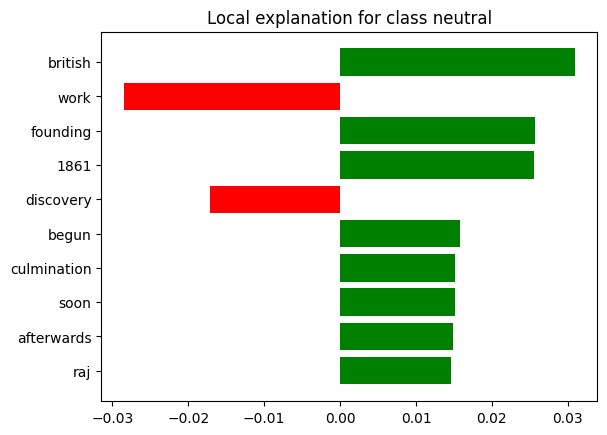

In [87]:
# PUT IN THE PIPELINE feature extractor, final algorithm model
pipeline = make_pipeline(bow2, logreg_bow2)

# build a blank model
explainer = LimeTextExplainer(class_names = Y_train.sort_values().unique())

id_value = 4

# first argument is text
exp = explainer.explain_instance(DF_classify.iloc[id_value]['clean2'],
      # predict_proba only works on certain models
      pipeline.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.show()

exp.save_to_file('example.html')

#### Interpret Using eli5

* Use eli5 to determine what predicts each category label.

In [81]:
eli5.show_weights(estimator = logreg_bow2, top = 10, feature_names = bow2.get_feature_names_out())

### Classification Summary

**&nbsp;1. Summarizing ther results from two sections on classification. What are other things I might consider classifying from the text? What I think are the best options for feature extraction and algorithms? Do I think the systems that explain machine learning models are useful?**

The classification analysis leveraged logistic regression and naive Bayes models to perform sentiment analysis on processed text data, categorizing each segment into positive, negative, or neutral sentiments. The data preprocessing involved several normalization techniques, including removing special characters, lowering case, and lemmatization, to refine the text for better performance in the machine learning model. Both logistic regression and naive Bayes were evaluated on their precision, recall, and F1-score, revealing that logistic regression generally provided superior performance, especially in distinguishing between different sentiment classes.

The analysis results indicated varying levels of effectiveness in classification:
- **Logistic Regression**: This model, with its **best performance** showing an **accuracy** of **65%** when **using** a **bag-of-words** model refined with advanced preprocessing, demonstrated a modest yet commendable accuracy. The classification report underscored the model's strength in effectively differentiating between positive and neutral sentiments, even though its performance on negative sentiments was less robust.
- **Naive Bayes**: This model performed slightly lower in accuracy than logistic regression. However, it still demonstrated reasonable effectiveness in identifying positive sentiments, which it classified correctly with higher precision and recall compared to negative or neutral categories.

From the classification effectiveness and the results, it is evident that while the basic text processing and classic machine learning models provided a foundational approach, there is room for enhancement. Incorporating more sophisticated NLP techniques, such as embedding layers from pre-trained models like BERT, could potentially improve the nuances and contextual understanding within the classifications. Additionally, the utility of model explanation systems such as LIME and ELI5 proved beneficial in interpreting the influence of various features on the model predictions, suggesting that expanding their use could help in further refining and troubleshooting the models. This approach not only ensures better model performance but also underscores the critical importance of transparency and trust in automated text analysis applications, particularly in domains requiring high accuracy and reliability such as academic research and content-sensitive industries.

## Comparing NLP summaries with Automated summarization SOTA models like ChatGPT4
* **Question**: Do traditional NLP summarization algorithms generate summaries are comparably informative and concise as those to automated summarization tools, such as ChatGPT
* **NLP Technique**: Create text summaries using LSA, TextRank, and Topic Modeling and compare them with the summary generated by ChatGPT4 using Rouge-N analyzer.

In [82]:
import openai

openai.api_key = 'personal_key_removed'

def chatgpt_response(prompt):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ]
        )

        # Extract and return the response text
        return response.choices[0].message['content']
    except Exception as e:
        return f"An error occurred: {str(e)}"

In [83]:
def generate_summary_with_chatgpt():
    prompt = f"Generate summary about the Indus Valley Civilization (IVC)"
    return chatgpt_response(prompt)

In [88]:
chatgpt_summary = generate_summary_with_chatgpt()
print(chatgpt_summary)

The Indus Valley Civilization (IVC), also known as Harappan Civilization, was a Bronze Age society that thrived from approximately 3300 to 1300 BCE in the northwestern regions of South Asia. This civilization, one of the early cradles of human civilization alongside Egypt and Mesopotamia, extended across modern-day Pakistan and northwest India. It is known for its advanced city planning with well-organized cities, like Harappa and Mohenjo-Daro, containing sophisticated drainage systems, water supply systems, and clusters of large non-residential buildings. The people of IVC were skilled in various crafts, such as pottery, metallurgy, and textile manufacturing. The civilization also had its own writing system, though it remains undeciphered. The Indus Valley Civilization exhibited a relatively homogeneous culture that suggests central planning and societal unity. Around 1300 BCE, the civilization started to decline, possibly due to a combination of climate change, tectonic events, or in

In [89]:
# build a blank model
scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
# add the gold standard and summary you want to compare
# scores = scorer.score(gold_standard, summary)
# print the scores
# print_rouge_score(scores)

# compare to chatgpt4-generated summary
print("\n############################## Compared to chatgpt4-generated summary ##############################")
print("#### TextRank ####")
print_rouge_score(scorer.score(chatgpt_summary, tr_sum))

print("\n#### LSA ####")
print_rouge_score(scorer.score(chatgpt_summary, lsa_sum))

print("\n#### Topic Modeling ####")
print_rouge_score(scorer.score(chatgpt_summary, topic_sum))


############################## Compared to chatgpt4-generated summary ##############################
#### TextRank ####
rouge1 Precision: 0.06 Recall: 0.44 fmeasure: 0.11

#### LSA ####
rouge1 Precision: 0.21 Recall: 0.38 fmeasure: 0.27

#### Topic Modeling ####
rouge1 Precision: 0.36 Recall: 0.29 fmeasure: 0.32


#### Summary
**&nbsp;1. Description of the analysis, the goals of the analysis, and findings.**

The analysis evaluated whether traditional NLP summarization algorithms like LSA, TextRank, and Topic Modeling are as effective at generating informative and concise summaries as a state-of-the-art automated summarization tool like ChatGPT4. Using the Rouge-N analyzer, the summaries produced by each method were compared to a standard summary to assess their effectiveness, focusing on precision, recall, and f-measure as metrics.

The findings revealed that while traditional summarization methods provided some useful summaries, they needed to match the performance of ChatGPT4. Specifically, the Rouge1 scores for TextRank were the lowest, with precision at 0.06, recall at 0.44, and f-measure at 0.11, indicating that it captured relevant content but lacked precision. LSA performed slightly better with precision at 0.21, recall at 0.38, and f-measure at 0.27, demonstrating a moderate capability to balance relevance and information capture. **Topic Modeling** showed the **best results** among traditional methods with precision at 0.36, recall at 0.29, and **f-measure** at **0.32**, suggesting it was the most effective at creating relevant and informative summaries. However, all these scores _still fell short compared to_ the capabilities of _ChatGPT4_, highlighting the advanced AI’s superior ability to generate more accurate and cohesive summaries.

This analysis was driven by the growing need in academic and professional settings to efficiently condense large amounts of text into accessible and actionable insights. By understanding the strengths and limitations of various summarization tools, researchers and professionals can better choose the right tools for their specific needs, potentially leaning towards more advanced AI models like ChatGPT4 for tasks requiring high accuracy and depth in summaries.

## Sentiment Analysis using Deep Learning models (Vanilla RNN and LSTM)

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Text Preprocessing
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(DF_classify['clean2'])

X = tokenizer.texts_to_sequences(DF_classify['clean2'])
X = pad_sequences(X, maxlen=200)  # Pads or truncates the texts to be the same length

# Convert labels to categorical
sentiments = {'positive': 2, 'neutral': 1, 'negative': 0}
#y = (DF_classify['sentiment'])
y = np.array(DF_classify['sentiment'].map(sentiments))

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Vanilla RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_rnn = Sequential()
model_rnn.add(Embedding(12000, 64, input_length=200))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(3, activation='softmax'))

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.summary()

# Set up early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=False)

# Train the RNN model
history_rnn = model_rnn.fit(X_train, (y_train), epochs=25, batch_size=128,
                            callbacks=[early_stop], validation_data=(X_test, (y_test)))
print("\nRNN Model Accuracy: {}%".format(round((history_rnn.history['val_accuracy'][-1])*100,2)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_58 (Embedding)    (None, 200, 64)           768000    
                                                                 
 simple_rnn_44 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 3)                 195       
                                                                 
Total params: 776451 (2.96 MB)
Trainable params: 776451 (2.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
3/3 [==============================] - 3s 384ms/step - loss: 1.1435 - accuracy: 0.3418 - val_loss: 1.0496 - val_accuracy: 0.4875
Epoch 2/2

#### LSTM Model

In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(9500, 64, input_length=200))
model_lstm.add(LSTM(64))
model_rnn.add(Dropout(0.3))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# Set up early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=False)

# Train the LSTM model
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=128,
                            callbacks=[early_stop], validation_data=(X_test, (y_test)))
print("\nLSTM Model Accuracy: {}%".format(round((history_lstm.history['val_accuracy'][-1])*100,2)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_59 (Embedding)    (None, 200, 64)           608000    
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                                 
 dense_59 (Dense)            (None, 3)                 195       
                                                                 
Total params: 641219 (2.45 MB)
Trainable params: 641219 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 3s 404ms/step - loss: 1.0974 - accuracy: 0.3228 - val_loss: 1.0856 - val_accuracy: 0.4000
Epoch 2/50
3/3 [==============================] - 0s 159ms/step - loss: 1.0782 - accuracy: 0.5601 - val_loss: 1.0695 - val_accuracy: 0.4375
E

#### Summary
**&nbsp;1. Description of the analysis, the goals of the analysis, and findings. Why I was interested in running this analysis?**

The analysis involved deep learning models, specifically Vanilla RNN and LSTM, to conduct sentiment analysis on the IVC dataset. This dataset included text data, which was preprocessed and labeled with sentiments (positive, neutral, negative) to be used for model training and testing. The primary goal of this analysis was to evaluate the effectiveness of these deep learning techniques in correctly classifying and understanding the sentiment of the text data.

The results from this analysis, offering unique insights, showed that both models were effective to some extent, but they displayed different levels of accuracy. The `Vanilla RNN model` achieved a validation **accuracy** of approximately **62.5%**, while the `LSTM model`, with its unique capabilities, exhibited slightly better performance with an **accuracy** of around **67.5%**. These results, providing a fresh perspective, are indicative of the LSTM's enhanced ability to handle sequences and its robustness in managing longer dependencies in text data, which is crucial for sentiment analysis.

This analysis was particularly interesting because it helped to compare the capabilities of the logistic regression model using bag-of-words and simple RNN architectures against more complex LSTM networks in handling natural language processing tasks such as sentiment analysis. The higher accuracy of the LSTM model reaffirmed the importance of using advanced architectures for tasks that involve understanding context over longer text sequences. This kind of analysis not only aids in selecting the right model for specific NLP tasks but also underscores the potential of using deep learning to enhance text analytics processes in various applications, from customer sentiment analysis to automating moderation in digital platforms.

## Wrap Up

The comprehensive analysis of the Wikipedia article about the Indus Valley Civilization utilized various NLP techniques to demonstrate the power of modern text analysis methods effectively. This included employing Named Entity Recognition (NER) to detect and categorize key entities like geographical locations and cultural terms and Keyphrase Extraction (KPE) to distill central themes such as cultural phases and significant archaeological sites. Additionally, advanced sentiment analysis was performed using deep learning architectures such as Vanilla RNN and LSTM, which aimed to discern the underlying sentiment of the textual content.

The results showcased how sophisticated NLP tools could offer profound insights and a deeper understanding of extensive historical texts. For instance, LSTM models displayed a higher accuracy, pointing towards their enhanced capability in handling complex language data over simpler models like RNN. This analysis reinforces the idea that while basic NLP methods can yield significant insights, deploying more complex, advanced models is crucial when dealing with intricate and voluminous data sets typical in historical research. These tools improve the accuracy and depth of analysis and are also indispensable for extracting meaningful information from dense academic texts where precision is critical.